In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/financial_transactions_10k.csv')
data.shape

(10000, 10)

In [3]:
data.head()

,Transaction_ID,Date,Time,Customer_ID,Product_ID,Amount,Payment_Type,Country,Merchant_ID,Status
0,TX10000,2023-07-29,14:13:23,C2110,P66,312.09,PayPal,USA,M3,Pending
1,TX10001,2024-01-10,20:47:29,C8028,P53,57.23,PayPal,Australia,M13,Pending
2,TX10002,2023-07-17,21:06:18,C3841,P91,109.85,Credit Card,Canada,M34,Chargeback
3,TX10003,2024-04-28,02:24:08,C8116,P24,280.57,Credit Card,UK,M24,Completed
4,TX10004,2023-12-23,01:45:04,C9399,P52,148.74,NaN,USA,M21,Refunded


In [4]:
data['Customer_ID'].nunique()

6005

In [5]:
data.describe()

,Amount
count,9500.000000
mean,242.164057
std,177.575880
min,8.410000
25%,114.367500
50%,207.790000
75%,323.015000
max,1473.990000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  10000 non-null  object 
 1   Date            10000 non-null  object 
 2   Time            10000 non-null  object 
 3   Customer_ID     10000 non-null  object 
 4   Product_ID      10000 non-null  object 
 5   Amount          9500 non-null   float64
 6   Payment_Type    9000 non-null   object 
 7   Country         9500 non-null   object 
 8   Merchant_ID     10000 non-null  object 
 9   Status          10000 non-null  object 
dtypes: float64(1), object(9)
memory usage: 781.4+ KB


In [7]:
data.isnull().sum()/data.shape[0]

Transaction_ID    0.00
Date              0.00
Time              0.00
Customer_ID       0.00
Product_ID        0.00
Amount            0.05
Payment_Type      0.10
Country           0.05
Merchant_ID       0.00
Status            0.00
dtype: float64

In [8]:
data['Status'].value_counts()

Status
Completed     2545
Pending       2221
Refunded      2108
Cancelled     1651
Chargeback    1475
Name: count, dtype: int64

In [9]:
data.columns = ['transaction_id','date','time','customer_id','product_id','amount','payment_type','country','merchant_id','status']

In [10]:
data.sample(5)

,transaction_id,date,time,customer_id,product_id,amount,payment_type,country,merchant_id,status
2151,TX12151,2023-12-02,13:37:50,C7116,P62,209.23,Credit Card,USA,M48,Completed
3293,TX13293,2023-08-15,12:35:23,C8997,P2,36.25,Credit Card,UK,M50,Refunded
7480,TX17480,2023-12-06,18:28:26,C4700,P11,214.85,Credit Card,USA,M19,Chargeback
9080,TX19080,2024-03-21,10:01:49,C5934,P30,272.66,PayPal,USA,M22,Pending
2841,TX12841,2023-09-13,05:16:31,C3118,P2,352.79,PayPal,Canada,M42,Chargeback


In [11]:
data[data.amount.isnull()].sample(10)

,transaction_id,date,time,customer_id,product_id,amount,payment_type,country,merchant_id,status
8745,TX18745,2024-01-05,16:10:21,C4910,P12,NaN,Credit Card,UK,M16,Completed
7128,TX17128,2023-12-18,10:41:45,C4532,P66,NaN,Credit Card,USA,M15,Pending
6236,TX16236,2023-11-07,01:03:42,C2972,P34,NaN,PayPal,UK,M17,Completed
9805,TX19805,2024-01-27,21:56:29,C2803,P31,NaN,Credit Card,Canada,M2,Completed
2364,TX12364,2023-07-23,15:15:42,C5295,P26,NaN,Debit Card,UK,M39,Cancelled
8815,TX18815,2023-10-20,19:33:25,C4788,P28,NaN,Credit Card,Canada,M34,Chargeback
6303,TX16303,2024-03-21,19:50:11,C6131,P4,NaN,Credit Card,Canada,M23,Cancelled
5671,TX15671,2024-03-29,13:35:13,C1564,P27,NaN,Debit Card,USA,M43,Refunded
4384,TX14384,2024-04-10,03:42:53,C5372,P5,NaN,Debit Card,Canada,M12,Pending
9494,TX19494,2023-06-27,02:21:53,C5315,P55,NaN,Debit Card,UK,M33,Pending


In [12]:
dt_cols = ['date','time']
num_cols = ['amount']
cat_cols = ['payment_type','country']
ids_cols = ['transaction_id','customer_id','product_id','merchant_id']
target = 'status'

## Exploratory Data Analysis (EDA)

In [13]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Check Total USD (with exchange rate)

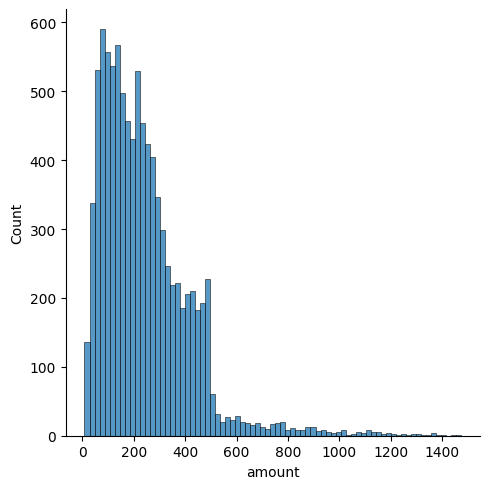

In [14]:
# check distriubution for amount
sns.displot(data=data, x='amount')

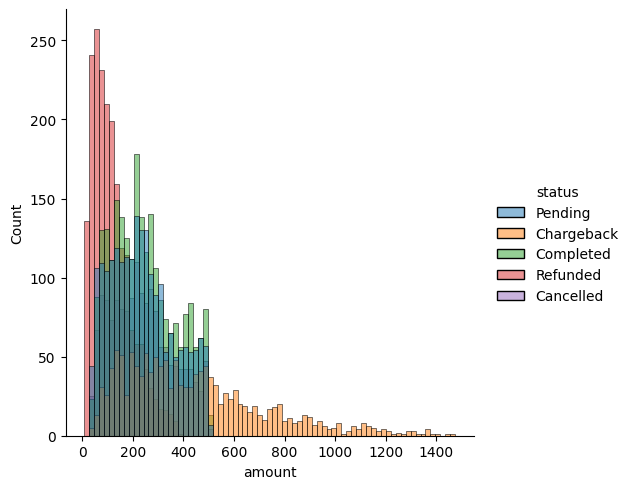

In [15]:
sns.displot(data=data, x='amount', hue=target)

In [16]:
data[data.amount>500].status.value_counts()

status
Chargeback    475
Name: count, dtype: int64

**Observation**

- majourity of refunded transactions have amounts between 0 - 180

In [17]:
data.country.value_counts()

country
USA          3854
UK           2909
Canada       1823
Australia     914
Name: count, dtype: int64

In [18]:
# convert to USD for each currency
data.loc[:, 'exchange_rate'] = 1.0
data.loc[data.country == 'Australia', 'exchange_rate'] = .65
data.loc[data.country == 'Canada', 'exchange_rate'] = .73
data.loc[data.country == 'UK', 'exchange_rate'] = 1.25

In [19]:
data['total_usd'] = data['amount'] * data['exchange_rate']

In [20]:
data.describe()

,amount,exchange_rate,total_usd
count,9500.000000,10000.000000,9500.000000
mean,242.164057,0.991514,240.401490
std,177.575880,0.206397,181.453242
min,8.410000,0.650000,6.241500
25%,114.367500,0.730000,106.141725
50%,207.790000,1.000000,205.015000
75%,323.015000,1.250000,331.852500
max,1473.990000,1.250000,1473.990000


In [21]:
data[num_cols+['exchange_rate','total_usd','country']].sample(10)

,amount,exchange_rate,total_usd,country
7177,43.99,0.73,32.1127,Canada
8133,259.86,1.00,259.8600,USA
9160,273.10,0.65,177.5150,Australia
3619,132.59,1.00,132.5900,USA
7242,440.57,1.00,440.5700,USA
8902,233.80,0.73,170.6740,Canada
1018,54.08,0.65,35.1520,Australia
5637,66.42,0.73,48.4866,Canada
776,410.48,1.00,410.4800,USA
9175,898.22,1.00,898.2200,USA


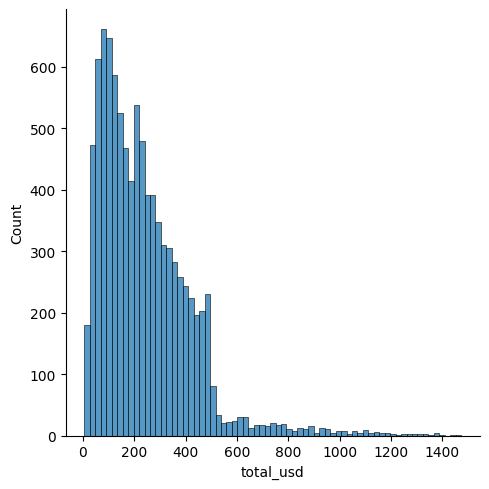

In [22]:
sns.displot(data['total_usd'])

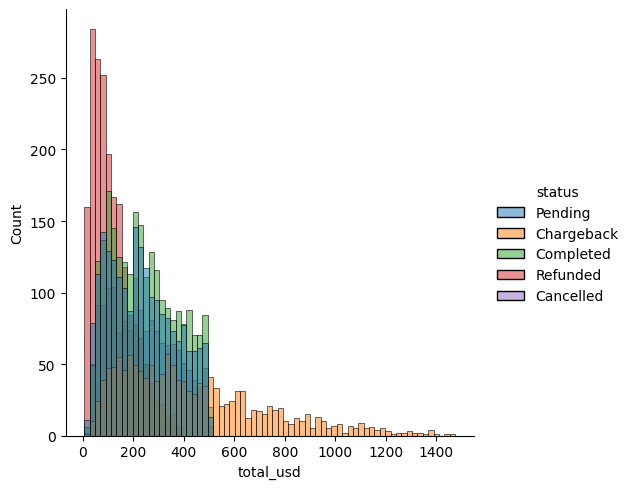

In [23]:
sns.displot(data=data, x='total_usd', hue=target)

In [24]:
cat_cols

['payment_type', 'country']

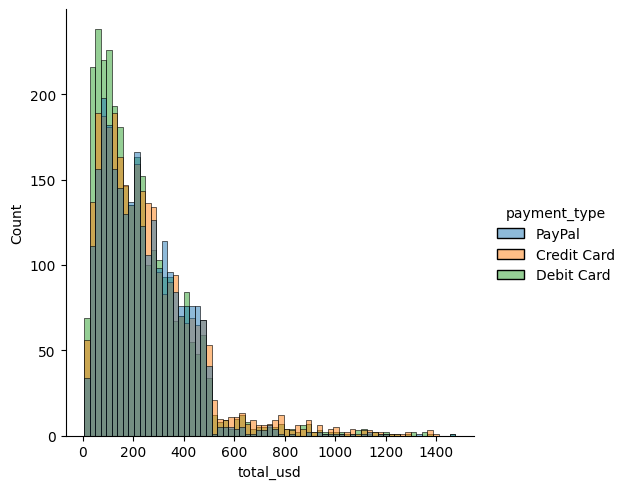

In [26]:
sns.displot(data=data, x='total_usd', hue='payment_type')

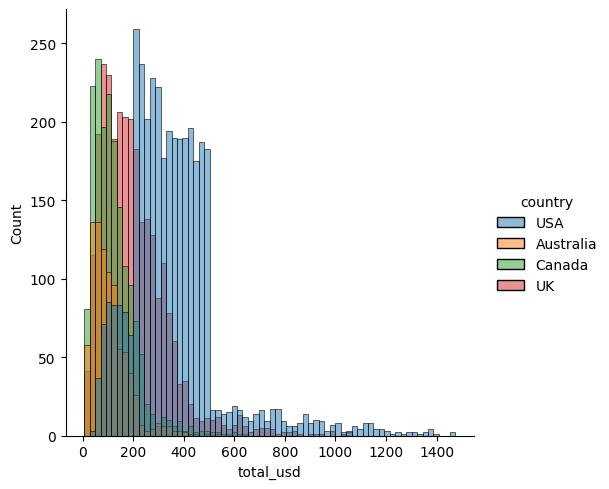

In [27]:
sns.displot(data=data, x='total_usd', hue='country')

In [39]:
data[(data.total_usd>210)].country.value_counts(normalize=True)

country
USA          0.702020
UK           0.241047
Canada       0.044307
Australia    0.012626
Name: proportion, dtype: float64

- USA & UK make up 96% of transactions greater than 500

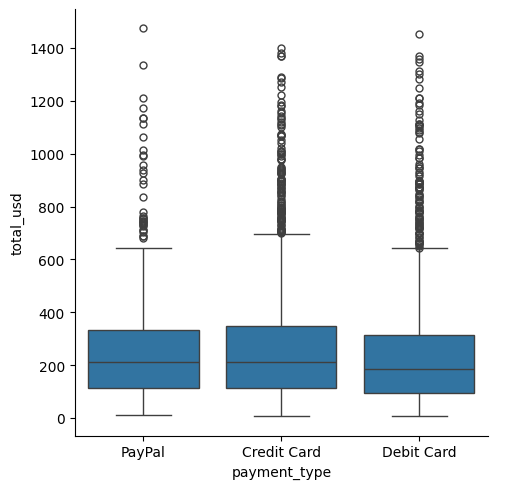

In [36]:
sns.catplot(data=data, x='payment_type', y='total_usd', kind='box')

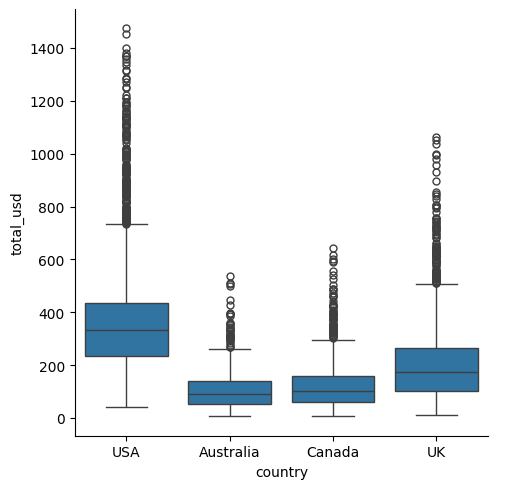

In [37]:
sns.catplot(data=data, x='country', y='total_usd', kind='box')

- USA and UK transaction make up 94% the top transactions by total_usd (>210)
- Transactions above 600 total_usd are most likely USA transactions

### Check Status

<Axes: xlabel='count', ylabel='status'>

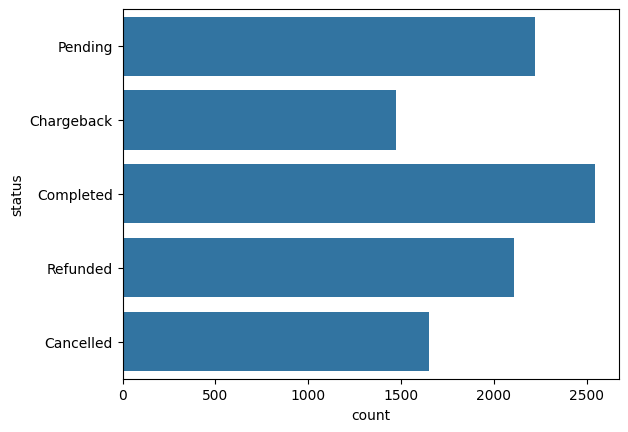

In [40]:
sns.countplot(data=data, y=target)

In [41]:
data.status.unique()

array(['Pending', 'Chargeback', 'Completed', 'Refunded', 'Cancelled'],
      dtype=object)

#### Refunded

In [42]:
refunded = data[data.status=='Refunded']
refunded.shape

(2108, 12)

In [43]:
refunded.sample(5)

,transaction_id,date,time,customer_id,product_id,amount,payment_type,country,merchant_id,status,exchange_rate,total_usd
9291,TX19291,2024-03-25,03:45:11,C3345,P2,135.22,Credit Card,UK,M42,Refunded,1.25,169.0250
6208,TX16208,2023-07-24,13:04:06,C4643,P49,15.37,Credit Card,UK,M37,Refunded,1.25,19.2125
4105,TX14105,2024-02-19,14:05:46,C7557,P15,29.95,Debit Card,UK,M3,Refunded,1.25,37.4375
4340,TX14340,2023-07-26,01:45:51,C1399,P72,57.97,Debit Card,UK,M9,Refunded,1.25,72.4625
5835,TX15835,2024-02-12,21:47:30,C8523,P100,13.75,Credit Card,UK,M13,Refunded,1.25,17.1875


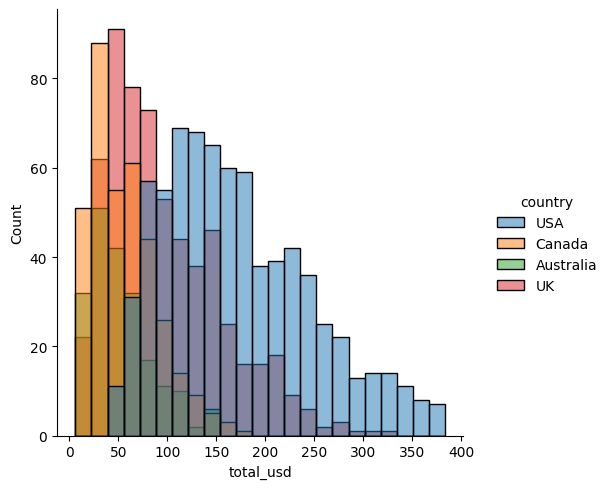

In [44]:
sns.displot(data=refunded, x='total_usd', hue='country')

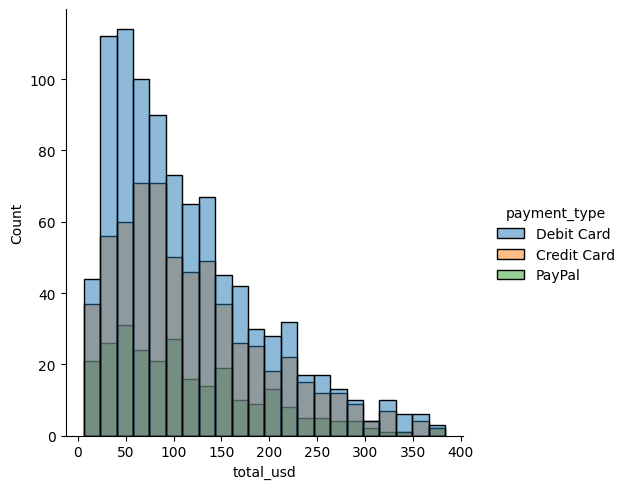

In [45]:
sns.displot(data=refunded, x='total_usd', hue='payment_type')

In [46]:
refunded.payment_type.value_counts(normalize=True)

payment_type
Debit Card     0.510926
Credit Card    0.344953
PayPal         0.144121
Name: proportion, dtype: float64

In [47]:
refunded[(refunded.total_usd>0)&(refunded.total_usd>210)].country.value_counts(normalize=True)

country
USA    0.878049
UK     0.121951
Name: proportion, dtype: float64

**Observation**

- USA make up almost 90% of refunded transactions between 0-210 total_usd
- Debit card transactions make ~50% of refunded transactions

#### Chargeback

In [48]:
charge_back = data[data.status=='Chargeback']
charge_back.shape

(1475, 12)

In [49]:
charge_back.sample(5)

,transaction_id,date,time,customer_id,product_id,amount,payment_type,country,merchant_id,status,exchange_rate,total_usd
7091,TX17091,2023-06-17,20:15:31,C5984,P76,510.64,Debit Card,Australia,M18,Chargeback,0.65,331.9160
6126,TX16126,2023-05-19,17:39:14,C1946,P4,88.82,Credit Card,UK,M17,Chargeback,1.25,111.0250
4289,TX14289,2023-08-25,05:08:05,C2452,P98,163.05,Debit Card,Canada,M32,Chargeback,0.73,119.0265
3953,TX13953,2023-10-16,20:44:44,C7298,P64,596.80,Credit Card,USA,M11,Chargeback,1.00,596.8000
7907,TX17907,2023-05-22,15:45:06,C5004,P10,355.05,NaN,NaN,M37,Chargeback,1.00,355.0500


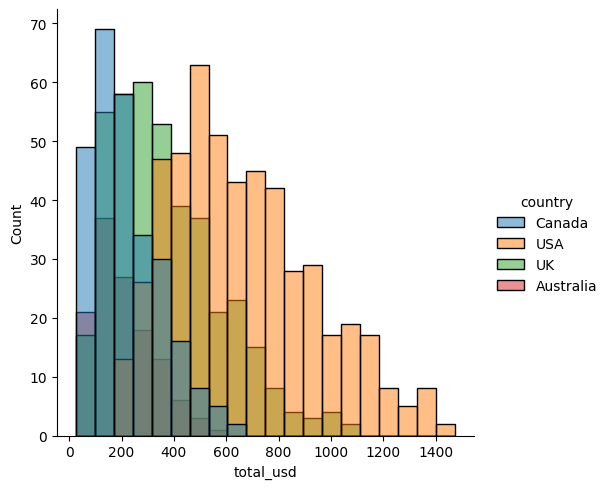

In [50]:
sns.displot(data=charge_back, x='total_usd', hue='country')

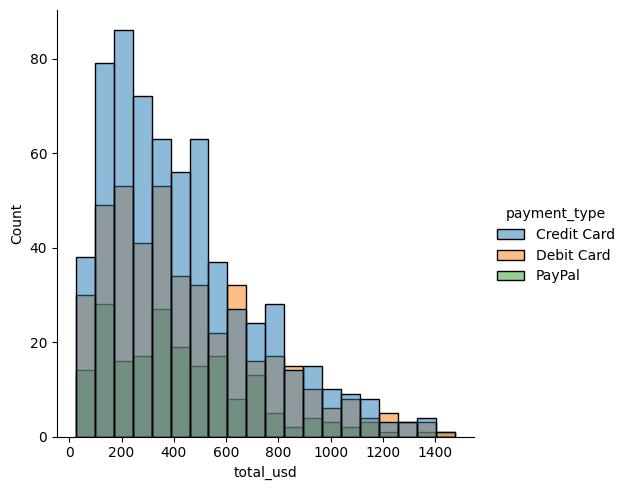

In [51]:
sns.displot(data=charge_back, x='total_usd', hue='payment_type')

In [54]:
charge_back.payment_type.value_counts(normalize=True)

payment_type
Credit Card    0.502242
Debit Card     0.343049
PayPal         0.154709
Name: proportion, dtype: float64

In [43]:
# sns.lineplot(data=charge_back.sort_values(['date','time']), x='date', y='total_usd')

- Credit card make up 50% of charge_back transactions.
- USA make up 70% of chargeback transactions greater than 400 total_usd

#### Cancelled

In [55]:
cancelled = data[data.status=='Cancelled']
cancelled.shape

(1651, 12)

In [56]:
cancelled.sample(5)

,transaction_id,date,time,customer_id,product_id,amount,payment_type,country,merchant_id,status,exchange_rate,total_usd
3585,TX13585,2024-04-20,21:57:20,C4183,P83,459.08,Credit Card,USA,M32,Cancelled,1.00,459.0800
67,TX10067,2023-08-12,01:44:32,C3451,P29,120.01,Credit Card,Canada,M43,Cancelled,0.73,87.6073
7359,TX17359,2024-02-17,19:38:16,C7290,P74,79.15,Credit Card,Canada,M31,Cancelled,0.73,57.7795
5559,TX15559,2023-09-03,01:42:36,C3385,P31,107.51,NaN,UK,M33,Cancelled,1.25,134.3875
699,TX10699,2023-08-28,07:21:16,C1005,P82,196.37,NaN,UK,M6,Cancelled,1.25,245.4625


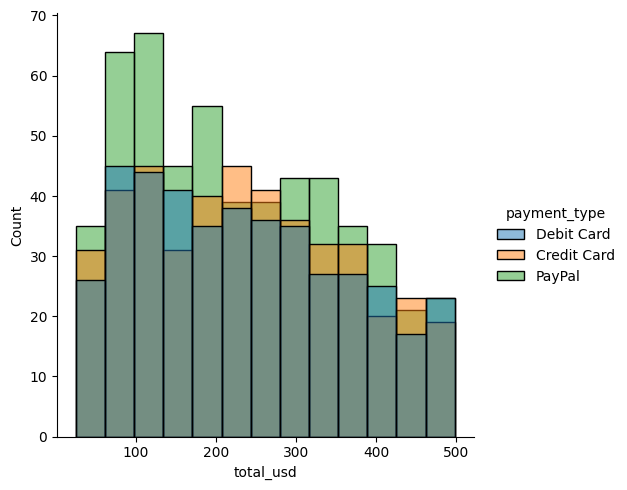

In [57]:
sns.displot(data=cancelled, x='total_usd', hue='payment_type')

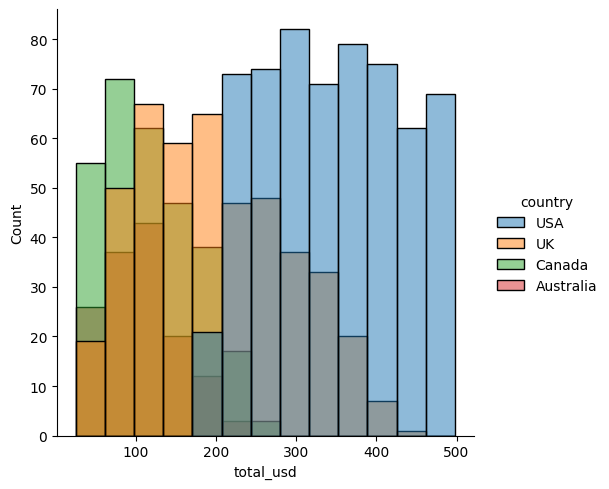

In [58]:
sns.displot(data=cancelled, x='total_usd', hue='country')

In [59]:
cancelled[(cancelled.total_usd>0)&(cancelled.total_usd<300)].country.value_counts(normalize=True)

country
UK           0.365141
Canada       0.286271
USA          0.211295
Australia    0.137293
Name: proportion, dtype: float64

In [60]:
# sns.lineplot(data=cancelled.sort_values(['date','time']), x='date', y='total_usd')

### Check Product_ID

In [61]:
data['product_id'].value_counts().sort_values(ascending=False).head(20)

product_id
P24     133
P6      128
P53     122
P21     120
P85     119
P23     119
P82     118
P100    118
P11     116
P5      114
P22     113
P90     112
P4      112
P93     111
P67     110
P83     110
P88     109
P12     109
P7      108
P30     108
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='product_id'>

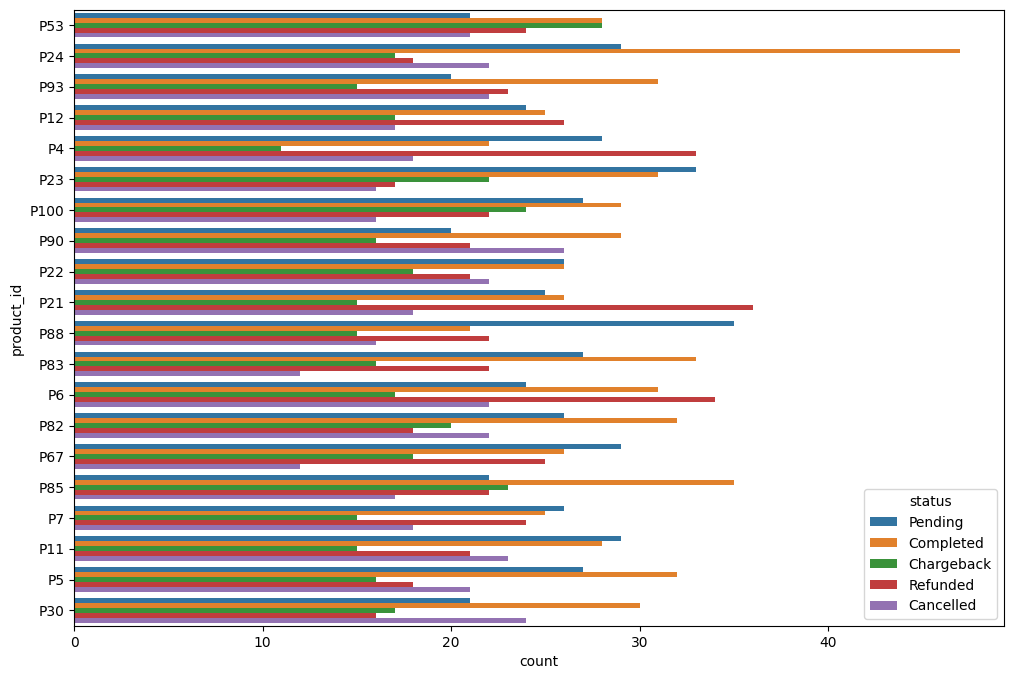

In [62]:
# top 20 products
plt.figure(figsize=(12,8))
sns.countplot(data=data[data.product_id.isin(data['product_id'].value_counts().sort_values(ascending=False).head(20).index.tolist())], y='product_id', hue='status')

<Axes: xlabel='count', ylabel='product_id'>

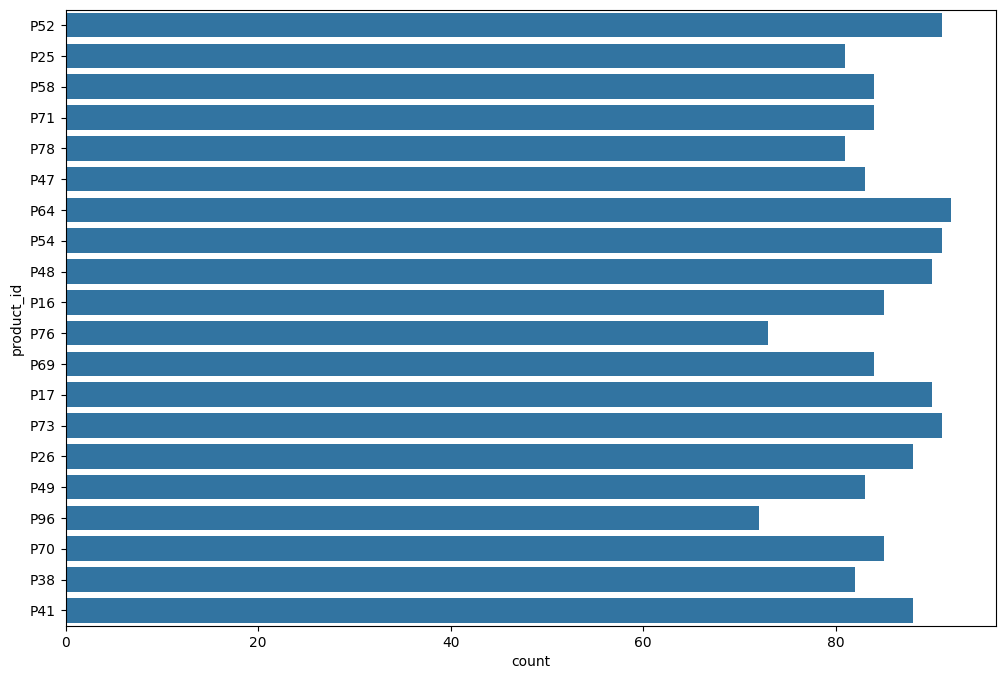

In [63]:
# bottom 20 products
plt.figure(figsize=(12,8))
sns.countplot(data=data[data.product_id.isin(data['product_id'].value_counts().sort_values(ascending=False).tail(20).index.tolist())], y='product_id')

In [68]:
top_20p = data[data.product_id.isin(data['product_id'].value_counts().sort_values(ascending=False).head(20).index.tolist())]

top_20p.pivot_table(index='product_id', columns='status', aggfunc='count')['transaction_id'].sort_values('Refunded', ascending=False).reset_index()

status,product_id,Cancelled,Chargeback,Completed,Pending,Refunded
0,P21,18,15,26,25,36
1,P6,22,17,31,24,34
2,P4,18,11,22,28,33
3,P12,17,17,25,24,26
4,P67,12,18,26,29,25
5,P53,21,28,28,21,24
6,P7,18,15,25,26,24
7,P93,22,15,31,20,23
8,P83,12,16,33,27,22
9,P85,17,23,35,22,22


**Observation**
- Product `P24` has the highest number of Completed transactions and eight highest Cancelled transactions
- Product `P53` has the highest number of Chargebacks
- Product `P21` has the highest number of Refunded transactions
- Product `P90` has the highest number of Cancelled transactions

### Check Merchant_ID

In [69]:
data.columns

Index(['transaction_id', 'date', 'time', 'customer_id', 'product_id', 'amount',
       'payment_type', 'country', 'merchant_id', 'status', 'exchange_rate',
       'total_usd'],
      dtype='object')

<Axes: xlabel='count', ylabel='merchant_id'>

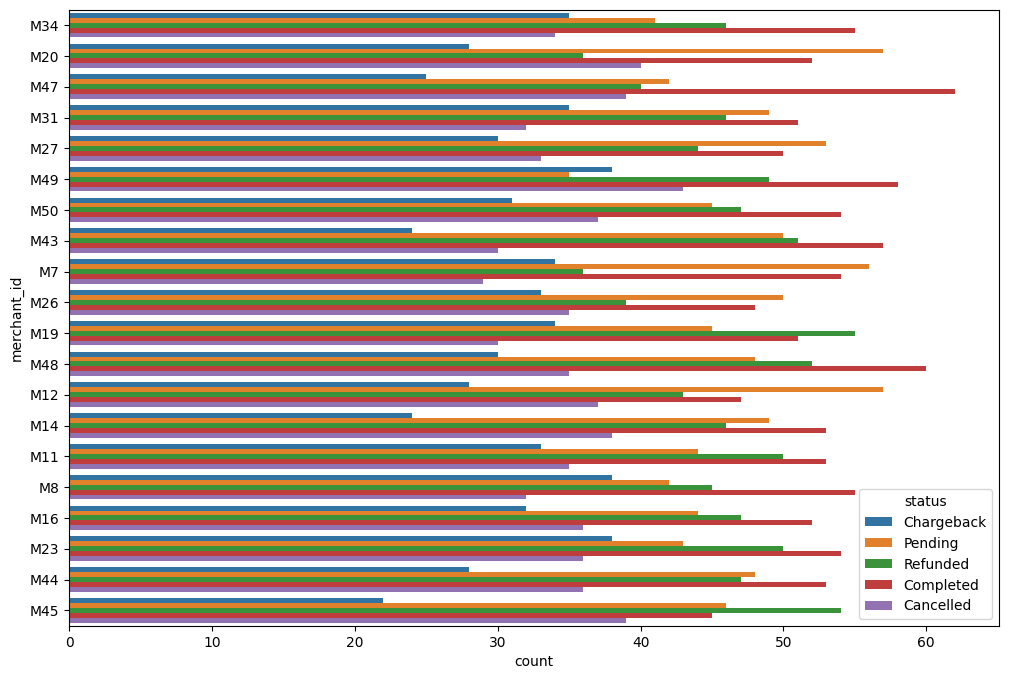

In [70]:
# top 20 merchants
plt.figure(figsize=(12,8))
sns.countplot(data=data[data.merchant_id.isin(data['merchant_id'].value_counts().sort_values(ascending=False).head(20).index.tolist())], y='merchant_id', hue='status')

In [76]:
top_20m = data[data.merchant_id.isin(data['merchant_id'].value_counts().sort_values(ascending=False).head(20).index.tolist())]

top_20m.pivot_table(index='merchant_id', columns='status', aggfunc='count')['transaction_id'].sort_values('Cancelled', ascending=False).reset_index()

status,merchant_id,Cancelled,Chargeback,Completed,Pending,Refunded
0,M49,43,38,58,35,49
1,M20,40,28,52,57,36
2,M45,39,22,45,46,54
3,M47,39,25,62,42,40
4,M14,38,24,53,49,46
5,M50,37,31,54,45,47
6,M12,37,28,47,57,43
7,M16,36,32,52,44,47
8,M23,36,38,54,43,50
9,M44,36,28,53,48,47


**Observation**
- Merchant `M49` has the highest number of Cancelled transactions
- Merchant `M47` has the highest number of Completed transactions and fourth highest number of Cnacelled transactions
- Merchant `M19` has the highest number of Refunded transactions
- Merchant `M8` highest number of Chargeback transactions and sixth highest number of Completed transactions

<Axes: xlabel='count', ylabel='merchant_id'>

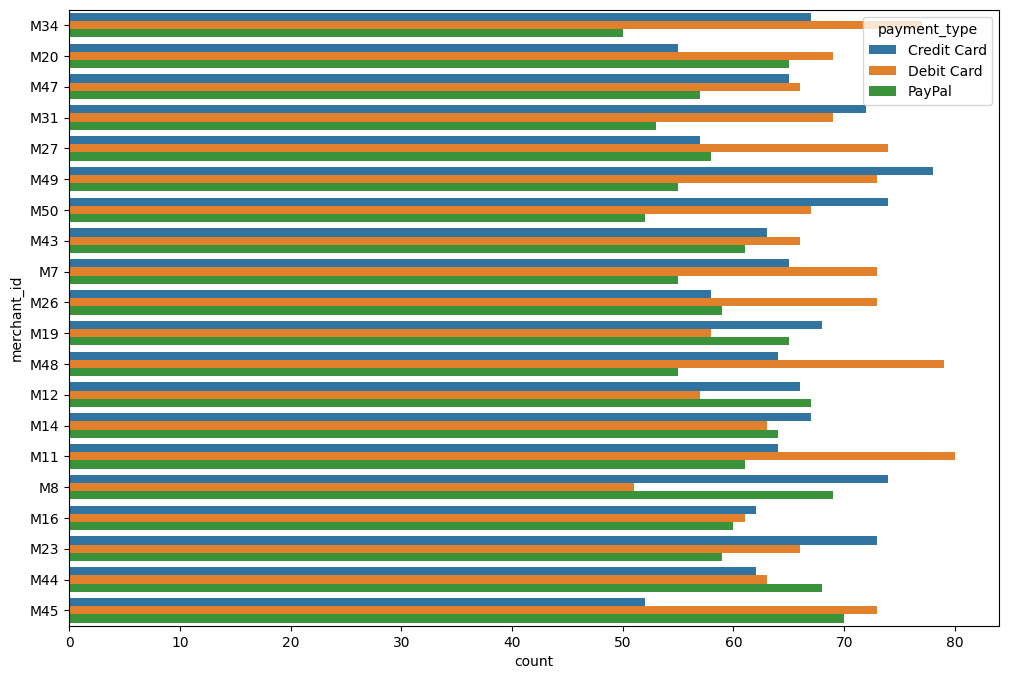

In [77]:
# top 20 merchants
plt.figure(figsize=(12,8))
sns.countplot(data=data[data.merchant_id.isin(data['merchant_id'].value_counts().sort_values(ascending=False).head(20).index.tolist())], y='merchant_id', hue='payment_type')

In [78]:
# top 20 merchants by payment type
top_20m = data[data.merchant_id.isin(data['merchant_id'].value_counts().sort_values(ascending=False).head(20).index.tolist())]

top_20m.payment_type.value_counts()

payment_type
Debit Card     1358
Credit Card    1306
PayPal         1203
Name: count, dtype: int64

In [79]:
top_20m.pivot_table(index='merchant_id', columns='payment_type', aggfunc='count')['transaction_id'].sort_values('Debit Card', ascending=False)

payment_type,Credit Card,Debit Card,PayPal
merchant_id,,,
M11,64,80,61
M48,64,79,55
M34,67,77,50
M27,57,74,58
M49,78,73,55
M26,58,73,59
M7,65,73,55
M45,52,73,70
M20,55,69,65


### Check date/time features

In [80]:
data[dt_cols].sample(5)

,date,time
5761,2024-01-10,07:53:43
2935,2023-09-18,11:52:11
7755,2024-02-15,01:12:46
9655,2023-08-01,21:31:22
1751,2023-11-16,10:31:12


In [81]:
# add date features
data['date_time'] = data['date'] + ' ' + data['time']
data['date_time'] = pd.to_datetime(data['date_time'])

data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['dow'] = data['date_time'].dt.dayofweek
data['hour'] = data['date_time'].dt.hour
data['is_weekend'] = (data.dow > 4).astype(int)

In [82]:
data[['date_time','year','month','day','dow','hour','is_weekend']].sample(5)

,date_time,year,month,day,dow,hour,is_weekend
8075,2023-07-03 02:59:38,2023,7,3,0,2,0
4656,2023-10-05 00:45:52,2023,10,5,3,0,0
7623,2024-04-22 03:14:24,2024,4,22,0,3,0
3420,2023-05-17 08:31:48,2023,5,17,2,8,0
72,2023-08-25 15:51:17,2023,8,25,4,15,0


<Axes: xlabel='count', ylabel='year'>

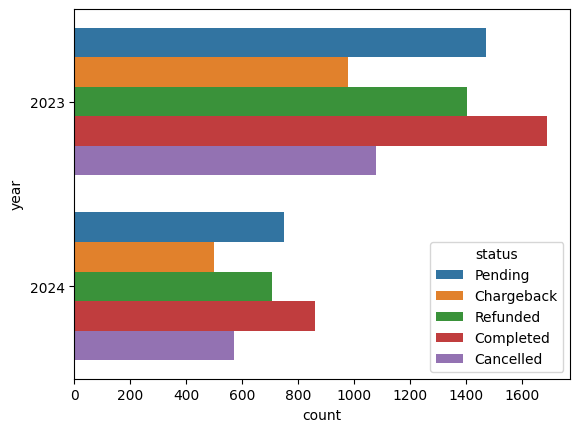

In [83]:
sns.countplot(data=data, y='year', hue='status')

<Axes: xlabel='count', ylabel='month'>

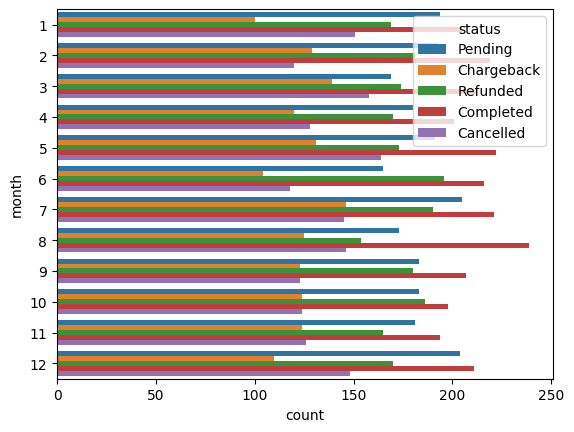

In [84]:
sns.countplot(data=data, y='month', hue='status')

In [97]:
data.pivot_table(index='month', columns='status', aggfunc='count')['transaction_id'].sort_values('Refunded', ascending=False).reset_index()

status,month,Cancelled,Chargeback,Completed,Pending,Refunded
0,6,118,104,216,165,196
1,7,145,146,221,205,190
2,10,124,124,198,183,186
3,2,120,129,219,193,181
4,9,123,123,207,183,180
5,3,158,139,212,169,174
6,5,164,131,222,191,173
7,4,128,120,201,180,170
8,12,148,110,211,204,170
9,1,151,100,205,194,169


**Observations**

- Month `5` has highest number of Cancelled transactions, second highest number of Completed transactions and third highest number of Chargeback transactions.
- Month `7` has highest number of Chargeback transaction, third highest number of Completed transactions and second highest number of Refunded transactions
- Month `8` has highest number of Completed transaction

<Axes: xlabel='count', ylabel='dow'>

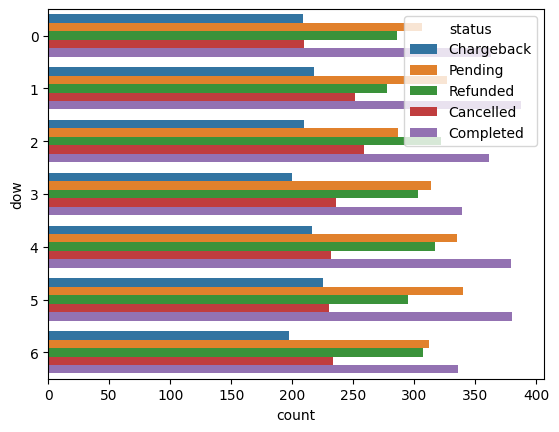

In [98]:
sns.countplot(data=data, y='dow', hue='status')

In [102]:
data.pivot_table(index='dow', columns='status', aggfunc='count')['transaction_id'].sort_values('Refunded', ascending=False).reset_index()

status,dow,Cancelled,Chargeback,Completed,Pending,Refunded
0,2,259,210,361,287,322
1,4,232,216,379,335,317
2,6,233,197,336,312,307
3,3,236,200,339,314,303
4,5,230,225,380,340,295
5,0,210,209,363,306,286
6,1,251,218,387,327,278


**Observations**

- DOW `5` has the highest number of Chargeback transactions and second highest number of Completed transactions.

<Axes: xlabel='count', ylabel='is_weekend'>

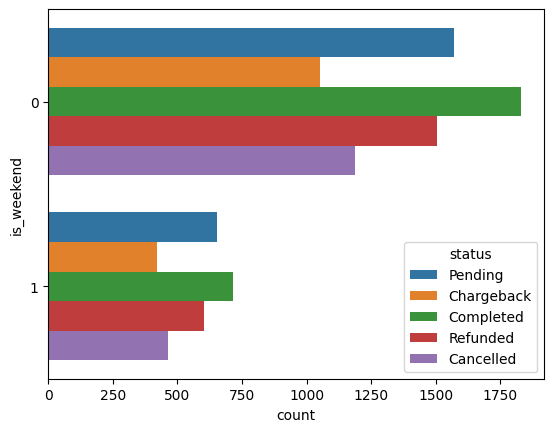

In [103]:
sns.countplot(data=data, y='is_weekend', hue='status')

In [104]:
# save to disk
data.to_csv('data/financial_transactions_10k_processed.csv')